## Data Analysis

In [1]:
#import all relevant packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import collections

%matplotlib inline

In [2]:
#reading the file
df = pd.read_csv(r'../Dataset/covtype.csv',index_col=None)
pd.set_option('max_columns', None)
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [3]:
#droping the columns with low standard deviation/high skewness as performed above
remaining=['Soil_Type7','Soil_Type8','Soil_Type14','Soil_Type15',
     'Soil_Type21','Soil_Type25','Soil_Type28','Soil_Type36','Soil_Type37']


In [4]:
#removing all above columns with low standard deviation as it will not impact our dependent variable
df.drop(remaining, axis=1, inplace=True)

In [5]:
# we will also remove Hillshade_3pm because of highly neagtive -0.78 co-related value
df.drop('Hillshade_3pm',axis=1, inplace=True)

In [6]:
#Final Data Set after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 45 columns):
Elevation                             581012 non-null int64
Aspect                                581012 non-null int64
Slope                                 581012 non-null int64
Horizontal_Distance_To_Hydrology      581012 non-null int64
Vertical_Distance_To_Hydrology        581012 non-null int64
Horizontal_Distance_To_Roadways       581012 non-null int64
Hillshade_9am                         581012 non-null int64
Hillshade_Noon                        581012 non-null int64
Horizontal_Distance_To_Fire_Points    581012 non-null int64
Wilderness_Area1                      581012 non-null int64
Wilderness_Area2                      581012 non-null int64
Wilderness_Area3                      581012 non-null int64
Wilderness_Area4                      581012 non-null int64
Soil_Type1                            581012 non-null int64
Soil_Type2                            581012 non-

### Data Modeling

Here we split our main data set into two forms X and Y

X -> List of independent variables
Y -> Dependent Variables

In [7]:
X=df.loc[:,'Elevation':'Soil_Type40']
y=df['Cover_Type']

In [8]:
#Splitting the data into  train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

In [9]:
#Scale a dataset
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)


## Random Forest

In [10]:
# Creating the model
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators=100, random_state=101)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)


In [11]:
#Statistics about the trees in random forest
n_nodes = []
max_depths = []

for ind_tree in classifier.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 77575
Average maximum depth 48


[[59962  3274     3     0    16     3   141]
 [ 1901 82697   168     4   123    82    18]
 [    0   138 10428    42     5   209     0]
 [    0     0    85   711     0    33     0]
 [   45   609    39     0  2166    11     0]
 [    8   166   363    15     3  4694     0]
 [  268    38     0     0     0     0  5836]]


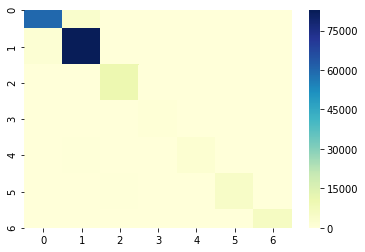

              precision    recall  f1-score   support

           1       0.96      0.95      0.95     63399
           2       0.95      0.97      0.96     84993
           3       0.94      0.96      0.95     10822
           4       0.92      0.86      0.89       829
           5       0.94      0.75      0.84      2870
           6       0.93      0.89      0.91      5249
           7       0.97      0.95      0.96      6142

    accuracy                           0.96    174304
   macro avg       0.95      0.91      0.92    174304
weighted avg       0.96      0.96      0.95    174304

0.9551932256287865


In [12]:
import seaborn
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
CM = confusion_matrix(y_test, y_pred)
print(CM)
seaborn.heatmap(CM,cmap="YlGnBu")
plt.show()
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

### Testing the model with user input

In [13]:
#Copying the above X dataframe into X1 dataframe for testing
X1=X

In [14]:
#dropping all datas from dataframe
X1.drop(X1.index, inplace=True)

C:\Users\souma\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [15]:
#Selected one row from the main dataset to use its value as an input for predicting the Cover_Type
pd.set_option('max_columns', None)
print("First row of the data frame:")
df.iloc[3:4]

First row of the data frame:


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type26,Soil_Type27,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
3,2785,155,18,242,118,3090,238,238,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2


In [16]:
#displaying all columns in the dataframe
pd.set_option('max_columns', None)
X1.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type26,Soil_Type27,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type38,Soil_Type39,Soil_Type40


In [17]:
#providing user inserted values in data frame X1
X1.loc[0] = [2785,155,18,242,118,3090,238,238,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0] 

C:\Users\souma\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [18]:
#viewing the dataframe with user input
X1.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type26,Soil_Type27,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type38,Soil_Type39,Soil_Type40
0,2785,155,18,242,118,3090,238,238,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [19]:
y_pred=classifier.predict(X1)

In [20]:
print("Predicted Cover Type :")
print(y_pred)

Predicted Cover Type :
[2]


### Conclusion

We implemented Random Forest and got accuracy around 95%. Then we used user defined data and used in our model which predicted the expected cover type 2. 